In [4]:
import pandas as pd
from sqlalchemy import create_engine

engine = create_engine(
    'mssql+pyodbc://localhost/Project1?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes'
)
tdf = pd.read_sql('SELECT * FROM machine_prop', engine)
print(tdf.head())


   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  RNF  
0    0    0    0    0  
1    0    0    0    0  
2    0  

In [6]:
# Drop columns not needed for ML
tdf = tdf.drop(['UDI', 'Product ID' , 'Machine failure', 'HDF', 'PWF', 'OSF', 'RNF'], axis=1)

# Encode 'Type' as dummies
tdf = pd.get_dummies(tdf, columns=['Type'])

# Check for missing values
print(tdf.isnull().sum())
tdf = tdf.dropna()  # Or use imputation

# (Optional) Explore data, correlations, etc.


Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
TWF                        0
Type_H                     0
Type_L                     0
Type_M                     0
dtype: int64


In [10]:
from sklearn.model_selection import train_test_split
t_x = tdf.drop(['TWF'],axis = 1)
t_y = tdf['TWF']
tx_train, tx_test, ty_train, ty_test = train_test_split(
    t_x, t_y, stratify=t_y, test_size=0.2, random_state=42
)

In [28]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import classification_report, confusion_matrix

#tclf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
#tclf.fit(tx_train, ty_train)
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(tx_train, ty_train)
tclf.fit(X_res, y_res)

ty_pred = tclf.predict(tx_test)
print(classification_report(ty_test, ty_pred))
print(confusion_matrix(ty_test, ty_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1991
           1       0.00      0.00      0.00         9

    accuracy                           0.99      2000
   macro avg       0.50      0.50      0.50      2000
weighted avg       0.99      0.99      0.99      2000

[[1976   15]
 [   9    0]]


In [30]:
print(ty_test.value_counts())


TWF
0    1991
1       9
Name: count, dtype: int64


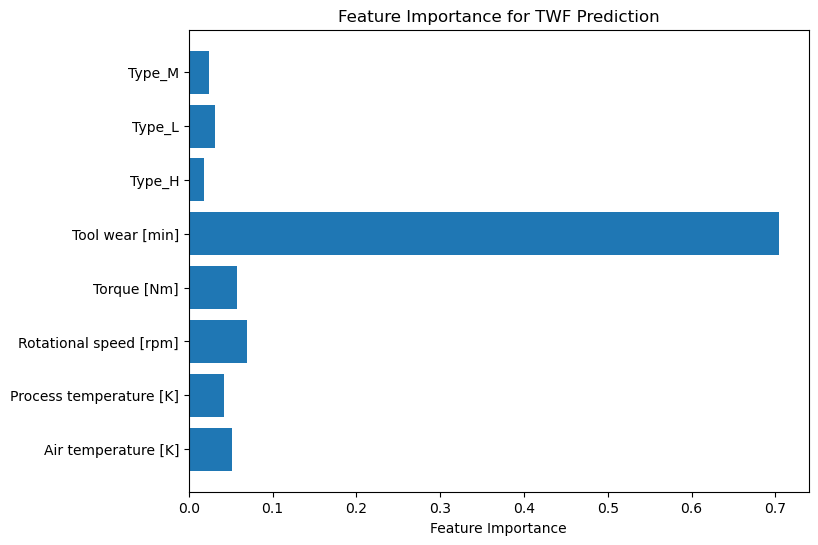

In [32]:
import matplotlib.pyplot as plt

feature_names = tx_train.columns
importances = tclf.feature_importances_

plt.figure(figsize=(8, 6))
plt.barh(feature_names, importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance for TWF Prediction")
plt.show()


In [34]:
import pandas as pd

# Get feature names (from your X_res or tx_train, depending on your workflow)
feature_names = tx_train.columns  # or X_res.columns if you have dummy variables

# Get importances from the model
importances = tclf.feature_importances_

# Build a DataFrame
importance_table = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance (descending)
importance_table = importance_table.sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importance_table)


                   Feature  Importance
0          Tool wear [min]    0.704555
1   Rotational speed [rpm]    0.069347
2              Torque [Nm]    0.057155
3      Air temperature [K]    0.051696
4  Process temperature [K]    0.042611
5                   Type_L    0.031815
6                   Type_M    0.024277
7                   Type_H    0.018543


In [ ]:
importance_table = importance_tables.rename(columns={
    'Tool wear [min]': 'TWF',
    'old_column_name2': 'new_column_name2',
    # Add more as needed
})
